## The tweets for the flights response

In [3]:
## loading the dataset and the checking the head of the data
import pandas as pd 
tweets=pd.read_csv("Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
## shape of the dataset
tweets.shape

(14640, 15)

In [5]:
## check the description of dataset 
tweets.describe(include="all")

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
## importing the fastai library
import fastai
from fastai.text import *
from fastai.callbacks import *

In [8]:
## checking the target variable
tweets.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [9]:
## checking the unique values
tweets.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American'], dtype=object)

In [12]:

tweets.airline_sentiment_gold.unique()

array([nan, 'negative', 'neutral', 'positive'], dtype=object)

In [13]:
## split train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(tweets)

In [14]:
## check the text learning
data_lm = TextLMDataBunch.from_df('.', train,test,text_cols='text',label_cols='airline_sentiment')

In [15]:
data_lm.save()

In [17]:
## check the classification of bunch
data_clas  = TextClasDataBunch.from_df('.', train_df=train,text_cols='text',label_cols='airline_sentiment',valid_df=test,vocab=data_lm.train_ds.vocab)

In [18]:
data_clas.save()

In [19]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @united i xxup just xxup asked xxup my xxup boyfriend xxup to xxup prom xxup over xxup the xxup xxunk xxup on xxup flight 494 xxup he xxup said xxup yes xxrep 4 ! xxup best xxup day xxup ever ! ! ! xxup thank u xxup so xxup much xxrep 6 !,positive
xxbos @americanair xxmaj aww xxmaj thanks xxup aa .. xxup dfw was on xxup xxunk up here this xxup am .. so i understand .. xxmaj btw xxup xxunk is my xxmaj airline when i m able to xxunk .. xxmaj love you guys . : ),positive
"xxbos xxup @usairways xxup are xxup you xxup kidding xxup me ? ? xxmaj bad customer service , folks . xxmaj flew from xxup psp to xxup phx flight 2692 on 2 / 19 . ( cont ) http : / / t.co / xxunk",negative
xxbos @usairways - flight was xxmaj cancelled xxmaj flightled to xxmaj buf today . xxmaj waited in line for 2 + hrs & & cus service was rude . xxmaj no flight until xxmaj tues . xxmaj need to get to xxup roc .,negative


In [20]:
data_clas.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [21]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3,pretrained=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 6.31E-02


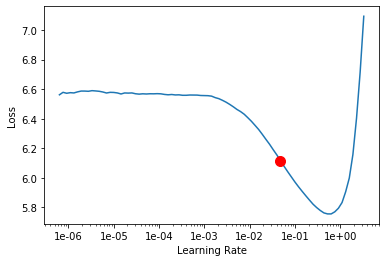

In [22]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [23]:
learn.fit_one_cycle(2, 5.75E-02,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.567085,4.011136,0.252935,07:59
1,3.926543,3.825242,0.273080,08:51


Better model found at epoch 0 with valid_loss value: 4.011135578155518.
Better model found at epoch 1 with valid_loss value: 3.8252415657043457.


In [24]:
learn.save('fit_head')

In [25]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-06
Min loss divided by 10: 1.32E-03


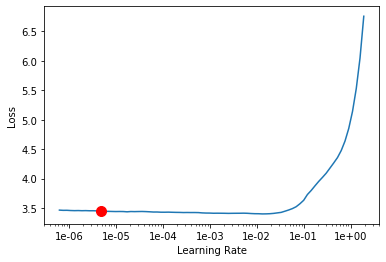

In [26]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
learn.fit_one_cycle(3,3.98E-04,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.378170,3.782123,0.281071,13:51
1,3.286157,3.754989,0.286272,20:58
2,3.175379,3.767092,0.286998,13:50


Better model found at epoch 0 with valid_loss value: 3.782122850418091.
Better model found at epoch 1 with valid_loss value: 3.7549891471862793.


In [28]:
learn.load('best_lm')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (10980 items)
x: LMTextList
xxbos @usairways how about checking the plane before having everyone board the plane ? # pissed,xxbos @americanair @usairways cost me a day of vacation ( $ 350 hotel stay ) , day of dog boarding , and a day of airport parking .,xxbos @united i 'm very frustrated and have wasted 2 days now due to your equipment failures .,xxbos @united xxmaj just boarded xxup xxunk , was refused from carrying overhead bag as no space , in plane now with loads of space # fail # customerexperience,xxbos @usairways i 've been on a music hold for over a hour trying to get my aadvantage membership merged , can someone please call me xxup asap ?
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (3660 items)
x: LMTextList
xxbos @virginamerica is saving my xxunk right now : http : / / t.co / xxunk,xxbos @united dm'ed you,xxbos @southwestair i love ya but your xxunk me down . xxmaj an hour xxmaj late xxmaj flight leaving and now we 

In [29]:
learn.save_encoder('AIBoot_enc')

In [30]:
learn1 = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)

In [31]:
learn1.load_encoder('AIBoot_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (10980 items)
x: TextList
xxbos @usairways how about checking the plane before having everyone board the plane ? # pissed,xxbos @americanair @usairways cost me a day of vacation ( $ 350 hotel stay ) , day of dog boarding , and a day of airport parking .,xxbos @united i 'm very frustrated and have wasted 2 days now due to your equipment failures .,xxbos @united xxmaj just boarded xxup xxunk , was refused from carrying overhead bag as no space , in plane now with loads of space # fail # customerexperience,xxbos @usairways i 've been on a music hold for over a hour trying to get my aadvantage membership merged , can someone please call me xxup asap ?
y: CategoryList
negative,negative,negative,negative,negative
Path: .;

Valid: LabelList (3660 items)
x: TextList
xxbos @virginamerica is saving my xxunk right now : http : / / t.co / xxunk,xxbos @united dm'ed you,xxbos @southwestair i love ya but your xxunk me down . xxmaj an hour xxmaj lat

In [32]:
learn1.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-02
Min loss divided by 10: 5.25E-02


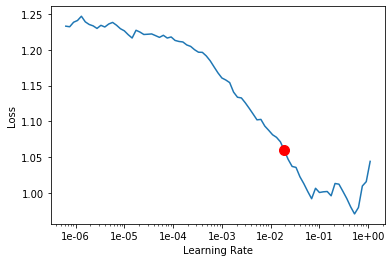

In [33]:
learn1.recorder.plot(suggestion=True)

In [34]:
best_clf_lr = learn1.recorder.min_grad_lr
best_clf_lr

0.019054607179632484

In [35]:
learn1.fit_one_cycle(1, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.642749,0.520153,0.785519,07:01


In [36]:
learn1.freeze_to(-2)

In [37]:
learn1.fit_one_cycle(1, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.591251,0.471636,0.813934,07:40


In [38]:
learn1.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.58E-07


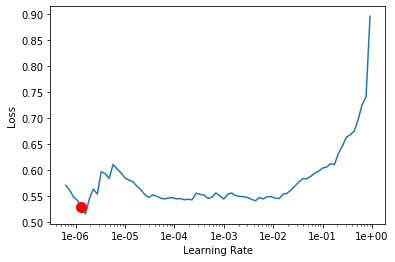

In [39]:
learn1.lr_find()
learn1.recorder.plot(suggestion=True)

In [40]:
learn1.fit_one_cycle(3, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.515272,0.461074,0.811475,12:58
1,0.406952,0.451561,0.823770,11:42
2,0.180061,0.469460,0.828962,11:21


In [41]:
learn1.show_results()

text,target,prediction
xxbos @usairways xxup plans xxup changed ! xxup is xxup that xxup what u xxup call xxup not xxup xxunk xxup able 2 xxup park xxup on xxup time xxup planes w a 2 xxup hr xxup layover n b xxup able 2 xxup make xxup ur xxup connection ! # seriously,negative,negative
xxbos @americanair xxmaj hi . i have xxup xxunk - xxup lax - xxup phl - xxup ord booked as a 1-way xxunk xxunk . xxmaj if i called to xxunk it to xxup xxunk - xxup lax - xxup phx - xxup ord would i have to pay any fees,neutral,neutral
"xxbos @usairways e xxrep 4 y ! xxmaj cancelled xxmaj flightlations , xxmaj flight xxmaj booking xxmaj problemss , reflight xxmaj booking xxmaj problemss , but y' all got me on the same flight out tonight ( not tomorrow ) & & the xxup fc upgrade . xxmaj thx !",positive,negative
"xxbos @jetblue i ❤ ️ xxmaj jetblue but i was on flt xxunk from fll to sfo . xxunk off was over 1 hr xxmaj late xxmaj flight , div to phx & & got in 2 hrs xxmaj late xxmaj flight . xxmaj what will be done ?",negative,negative
"xxbos @southwestair i had to travel to xxmaj savannah , xxup xxunk , once again , on an airline i do n't "" xxmaj luv "" . xxmaj when r u going to fly me to xxmaj savannah ? xxmaj pl xxrep 4 e ase xxrep 4 !",neutral,positive


In [43]:
## checking the predication model
preds, targets = learn1.get_preds()
predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1,2
row_0,,,
0,2140,198,67
1,157,489,81
2,69,54,405
